# <span style="font-family:Georgia, serif; font-size:28px;"> Telecom Customer Churn Analysis and Prediction </span>


# <span style="font-family:Georgia, serif; font-size:28px;"> 1. Loading libraries and data</span>

<span style="font-family:Georgia, serif; font-size:20px;"> Basic Imports</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


<span style="font-family:Georgia, serif; font-size:20px;"> Dataset Import</span>

In [3]:
#loading data
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

___

# <span style="font-family:Georgia, serif; font-size:28px;"> 2. Interpreting the Dataset</span>

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**So, In this Telecom Company's Data we have,**
*  **Churn Column** - *Customers who left recently*

* **Services provided by the company to its customer** – *phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies*

* **Customer's Information Columns** - *Old/New Customer and their Active Period, contract, payment method, paperless billing, monthly charges, and total charges*

* **Customer's Demographic Columns** – *gender, age range, and if they have partners and dependents*

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

***
# <span style="font-family:serif; font-size:28px;"> 3. Data Cleaning </span>

In [8]:
#Since, we don't need customerID, We drop the column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Converting Object column to Numerical Column, which is actually holds Numerical data
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Fillna with mean values
df.fillna(df["TotalCharges"].mean())

#Removing missing values
df.dropna(inplace = True)

In [11]:
#Removing tenure equal to 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [12]:
#Categorizing Senior Citizen column for encoding
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


___

# <span style="font-family:serif; font-size:28px;"> 4. Visualizing The Data </span>
<span style="font-family:serif; font-size:23px;"> Gender Spread and Churn Distribution </span>


In [17]:
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Total Occurences of 'Male' and 'Female'
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)

# Total Occurences of 'Churn-Yes' and 'Churn-No'
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
# This specifies what information should be displayed 
# when hovering over different sections of the pie chart
fig.update_traces(hole=.55, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.83, y=0.5, font_size=20, showarrow=False)])

fig.data[0].marker.colors = ('#7fcdff','#326ada')
fig.data[1].marker.colors = ('#56c175','#ff9b35')

fig.show()

* Customers switched from current firm to another firm are 26.6 %.
* Gender Demography among customers are 49.5 % female and 50.5 % male.
---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Gender</span>


In [25]:
color_discrete_map = {"Male": "#7fcdff", "Female": "#326ada"}

fig = px.histogram(df, x="Churn", color="gender", barmode="group", title="<b>Churn Distribution w.r.t Gender: Male(M), Female(F)<b>", color_discrete_map = color_discrete_map, text_auto = True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* There's almost to null differences between the people who churned, as both men and women are churn in equal ratio.
---
<span style="font-family:serif; font-size:23px;"> Contract Distribution w.r.t Churn</span>


In [26]:
color_discrete_map = {"Month-to-month": "#7fcdff", "One year": "#326ada", "Two year": "#ff9b35"}

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Churn Distribution w.r.t Contract<b>", color_discrete_map = color_discrete_map, text_auto = True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers  who have signed One Year Contract and 3% of customers  who have signed Two Year Contract.

---

<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Payment Method</span>


In [24]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Churn distribution w.r.t. Customer Payment Method</b>",text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.data[0].marker.color = ('#7fcdff')
fig.data[1].marker.color = ('#326ada')
fig.data[2].marker.color = ('#ff9b35')
fig.data[3].marker.color = ('#56c175')


fig.show()

* Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.
---

<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Internet Services</span>


In [33]:
fig = px.histogram(df, x="Churn", color="InternetService", title="<b>Churn Distribution w.r.t Internet Service</b>",text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.data[0].marker.color = ('#7fcdff')
fig.data[1].marker.color = ('#326ada')
fig.data[2].marker.color = ('#ff9b35')


fig.show()

* Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers, further looking into the issue might find a better and apt solution.
* Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service

---

<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Dependants</span>


In [34]:
color_map = {"Yes": "#7fcdff", "No": "#326ada"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", color_discrete_map=color_map, text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn
---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Partners</span>



In [36]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map, text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* On the above visual, a conclusion can be obtained such that customers without dependents and customers who have partners are more likely to churn.
---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Senior Citizens </span>


In [37]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map, text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Eventhough the observed fraction of senior citizen is very less, most of the senior citizens churn.

---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Online Security </span>

In [38]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map, text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Absence of online security,makes most customers churn.

---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Paperless Billing </span>

In [39]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map, text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Paperless Billing seems like one the reasons because of which customers are most likely to churn.

---
<span style="font-family:serif; font-size:23px;"> Churn Distribution w.r.t Tech Support </span>

In [40]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}


fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Churn distribution w.r.t. TechSupport</b>", color_discrete_map=color_map, text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<span style="font-family:serif; font-size:18px;"> 
    <b>Conclusions</b>: 
    
    
● 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers who have signed One Year Contract and 3% of customers who have signed Two Year Contract.  
● Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.   
● Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers, further looking into the issue might find a better and apt solution.   
● Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service   
● Customers without dependents and customers who have partners are more likely to churn while senior citizens being the most of churn.    
● The absence of online security, Paperless Billing system and services with no TechSupport were the similiar trend are of the customers who are most likely churn.    
● There's a small fraction of customers who are more likely to churn and it's been found that they don't have a phone service.   </span>


# <span style="font-family:serif; font-size:28px;"> 5. Data Preprocessing</span>




### A) Splitting the data into train and test sets


In [42]:
# Defining a Function to Convert Objects to Int
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [43]:
df2 = df
df = df.apply(lambda x: object_to_int(x))
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [44]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


Because the numerical features are distributed over different value ranges, we will use standard scalar to scale to same range.

<a id = "111" ></a>
### B) Standardizing Numerical Features
<a id = "Standardizing" ></a>

In [47]:
scaler= StandardScaler()

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# <span style="font-family:serif; font-size:28px;"> 6. Multiple Machine Learning Model Evaluations and Testing</span>


<span style="font-family:serif; font-size:20px;"> I) SUPPORT VECTOR CLASSIFIER (SVC)</span>


SVM accuracy is : 0.8194740582800284
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.74      0.47      0.58       365

    accuracy                           0.82      1407
   macro avg       0.79      0.71      0.73      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


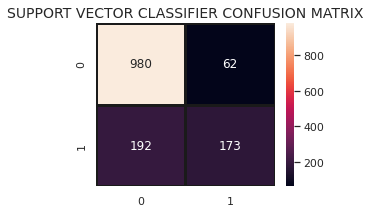

In [48]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print('-'*60)

print(classification_report(y_test, predict_y))
print('-'*60)

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()


<span style="font-family:serif; font-size:20px;"> II) RANDOM FOREST CLASSIFIER</span>


0.8230277185501066
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.74      0.50      0.59       365

    accuracy                           0.82      1407
   macro avg       0.79      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


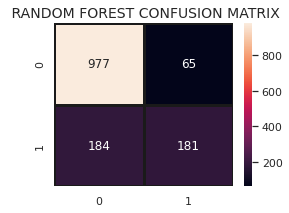

In [54]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, prediction_test) 
print (metrics.accuracy_score(y_test, prediction_test))
print('-'*60)

# 500, 50, 30

print(classification_report(y_test, prediction_test))
print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),annot=True,fmt = "d",linecolor="k",linewidths=3)

    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()



#### <b></b>
<span style="font-family:serif; font-size:20px;"> III) LOGISTIC REGRESSION</span>



Logistic Regression accuracy is : 0.820184790334044
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.56      0.62       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


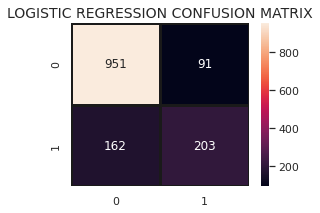

In [51]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()




<span style="font-family:serif; font-size:20px;">IV) DECISION TREE CLASSIFIER</span>



In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.7377398720682303
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1042
           1       0.49      0.50      0.50       365

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



Decision tree gives very low score.


<span style="font-family:serif; font-size:20px;"> V) ADABOOST CLASSIFIER</span>


AdaBoost Classifier accuracy
0.820184790334044
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.55      0.61       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



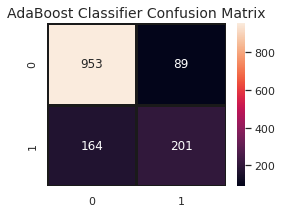

In [55]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
accuracy_ada = metrics.accuracy_score(y_test, a_preds) 
print(metrics.accuracy_score(y_test, a_preds))


print(classification_report(y_test, a_preds))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

In [59]:
model_names = ['Support Vector Classifier', 'Random Forest Classifier', 'Logistic Regression', 'Decision Tree Classifier', 'Adaboost Classifier']
accuracies = [accuracy_svc,accuracy_rf, accuracy_lr, accuracy_dt, accuracy_ada]

data = {'Model': model_names, 'Accuracy': accuracies}
metric = pd.DataFrame(data)

metric = metric.sort_values(by='Accuracy', ascending=False)

metric = metric.reset_index(drop=True)

metric

,Model,Accuracy
0,Random Forest Classifier,0.823028
1,Logistic Regression,0.820185
2,Adaboost Classifier,0.820185
3,Support Vector Classifier,0.819474
4,Decision Tree Classifier,0.737740


# <span style="font-family:serif; font-size:28px;">Conclusion:</span>

From the Above models, we can say that the **Random Forest Model** performs much better than the other models. 
Customer churn economically decreases the company's funds and affects it's profitability.

Analysis in Operational Level would help the management to find which departments or services is causing the customer to churn out. Based on identifying the issue, ample of  strategies can be implemented to eliminate customer churn. Identifying customers who are at risk of churning and working to improve their experience and the quality service would help in building customer loyalty.